<a href="https://colab.research.google.com/github/efdy-arch/klasifikasi-aksara-batak-dgn-SVM-dan-HOG/blob/main/Yet_another_copy_of_Klasifikasi_SVM_99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EKSTRAKSI FITUR

In [ ]:
import cv2
import os
import numpy as np
from skimage.feature import hog
import csv
def compute_hog_features(image):
    features = hog(image, orientations=9, pixels_per_cell=(2, 2),
                    cells_per_block=(2, 2))
    return features
# Path ke folder citra
folder_path = "/content/drive/MyDrive/dataset/datajadi"
# Path ke direktori baru untuk menyimpan file CSV
output_folder = "/content/drive/MyDrive/DATASET/TRAIN"
# Buat direktori jika belum ada
os.makedirs(output_folder, exist_ok=True)
# Path ke file CSV untuk menyimpan nilai fitur
csv_file = os.path.join(output_folder, "Train.csv")
# Buka file CSV untuk menulis
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Label', 'Features'])
    # Loop melalui semua file dalam folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            # Baca citra
            image = cv2.imread(os.path.join(folder_path, filename))
            # Ubah ke skala abu-abu
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            # Hitung fitur HOG
            hog_features = compute_hog_features(gray_image)
            # Ubah nama file
            name_only = os.path.splitext(filename)[0].split("_")[0]
            # Masukkan nilai fitur ke dalam file CSV
            writer.writerow([name_only, hog_features.tolist()])
print("Ekstraksi fitur selesai. Data disimpan di", csv_file)

Ekstraksi fitur selesai. Data disimpan di /content/drive/MyDrive/DATASET/TRAIN/Train.csv


#TRAINING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
import ast
# Membaca data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/DATASET/TRAIN/Train.csv')
print("Jumlah Data Pelatihan: ",data.shape)
# Mengonversi string fitur menjadi array numpy
X = np.array([ast.literal_eval(features) for features in data['Features']])
y = data['Label'].values

Jumlah Data Pelatihan:  (228, 2)


#Level 1 Klasifikasi


*   ga, la, pa, wa, ba, i, ra, ha, na
*   da, nga, ja, ma, sa, nya, ta, u, ya, a



In [ ]:
# Membagi data menjadi dua kelas besar sesuai level 1
level_1_class_1 = ['ga', 'la', 'pa', 'wa', 'ba', 'i', 'ra', 'ha', 'na']
level_1_class_2 = ['da', 'nga', 'ja', 'ma', 'sa', 'nya', 'ta', 'u', 'ya', 'a']
# Mengubah label menjadi dua kelas besar
y_level_1 = np.array(['class_1' if label in level_1_class_1 else 'class_2' for label in y])
# Membagi data untuk level 1
X_train_level_1, X_test_level_1, y_train_level_1, y_test_level_1 = train_test_split(X, y_level_1, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 1
svm_level_1 = svm.SVC(kernel='linear')
svm_level_1.fit(X_train_level_1, y_train_level_1)
# Memprediksi hasil pada data uji level 1
y_pred_level_1 = svm_level_1.predict(X_test_level_1)
# Menampilkan hasil klasifikasi level 1
print("Classification Report for Level 1:")
print(classification_report(y_test_level_1, y_pred_level_1))
# Mendapatkan nilai koefisien w dan bias b
w = svm_level_1.coef_
b = svm_level_1.intercept_
print("Koefisien w:", w)
print("Bias b:", b)

Classification Report for Level 1:
              precision    recall  f1-score   support

     class_1       0.96      1.00      0.98        25
     class_2       1.00      0.95      0.98        21

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46

Koefisien w: [[-0.00253284  0.00103973  0.00092804 ...  0.00400394 -0.00202605
  -0.00148878]]
Bias b: [0.63724808]


## Level 2 (Kelas 1 dari Level 1)
ha dan ga level 2

*   ga, la, pa, wa
*   ba, i, ra, ha, na



In [ ]:
# Melanjutkan ke level berikutnya hanya untuk class_1
X_class_1 = X[y_level_1 == 'class_1']
y_class_1 = y[y_level_1 == 'class_1']
# Membagi class_1 menjadi dua kelas sesuai level 2 ga la pa wa dan ba i ra ha na
level_2_class_1 = ['ga', 'la', 'pa', 'wa']
level_2_class_2 = ['ba', 'i', 'ra', 'ha', 'na']
# Mengubah label menjadi dua kelas level 2
y_level_2 = np.array(['class_1' if label in level_2_class_1 else 'class_2' for label in y_class_1])
# Membagi data untuk level 2
X_train_level_2, X_test_level_2, y_train_level_2, y_test_level_2 = train_test_split(X_class_1, y_level_2, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 2
svm_level_2 = svm.SVC(kernel='linear')
svm_level_2.fit(X_train_level_2, y_train_level_2)
# Memprediksi hasil pada data uji level 2
y_pred_level_2 = svm_level_2.predict(X_test_level_2)
# Menampilkan hasil klasifikasi level 2
print("Classification Report for Level 2:")
print(classification_report(y_test_level_2, y_pred_level_2))
# Mendapatkan nilai koefisien w dan bias b
w = svm_level_2.coef_
b = svm_level_2.intercept_
print("Koefisien w:", w)
print("Bias b:", b)

Classification Report for Level 2:
              precision    recall  f1-score   support

     class_1       0.90      1.00      0.95         9
     class_2       1.00      0.92      0.96        13

    accuracy                           0.95        22
   macro avg       0.95      0.96      0.95        22
weighted avg       0.96      0.95      0.95        22

Koefisien w: [[ 5.73099601e-03 -1.48149679e-05  2.72967717e-03 ... -2.52687996e-03
  -4.81572779e-03 -5.87348810e-04]]
Bias b: [-0.17275186]


###Level 3 (Kelas 1 dari level 2)
*   ga, la
*   pa, wa



In [ ]:
# Melanjutkan ke level berikutnya hanya untuk class_1 dari level 2
X_class_2_level_2 = X_class_1[y_level_2 == 'class_1']
y_class_2_level_2 = y_class_1[y_level_2 == 'class_1']
# Membagi class_1 level 2 menjadi dua kelas sesuai level 3 ga la dan pa wa
level_3_class_1 = ['ga', 'la']
level_3_class_2 = ['pa', 'wa']
# Mengubah label menjadi dua kelas level 3
y_level_3 = np.array(['class_1' if label in level_3_class_1 else 'class_2' for label in y_class_2_level_2])
# Membagi data untuk level 3
X_train_level_3, X_test_level_3, y_train_level_3, y_test_level_3 = train_test_split(X_class_2_level_2, y_level_3, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 3
svm_level_3 = svm.SVC(kernel='linear')
svm_level_3.fit(X_train_level_3, y_train_level_3)
# Memprediksi hasil pada data uji level 3
y_pred_level_3 = svm_level_3.predict(X_test_level_3)
# Menampilkan hasil klasifikasi level 3
print("Classification Report for Level 3:")
print(classification_report(y_test_level_3, y_pred_level_3))

Classification Report for Level 3:
              precision    recall  f1-score   support

     class_1       0.60      0.75      0.67         4
     class_2       0.80      0.67      0.73         6

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



#### Level 4 (Kelas 1 dari Level 3)


In [ ]:
# Melanjutkan ke level berikutnya hanya untuk class_1 dari level 3
X_class_3_level_3 = X_class_2_level_2[y_level_3 == 'class_1']
y_class_3_level_3 = y_class_2_level_2[y_level_3 == 'class_1']
# Membagi class_1 level 3 menjadi dua kelas sesuai level 4 ga dan la
level_4_class_1 = ['ga']
level_4_class_2 = ['la']
# Mengubah label menjadi dua kelas level 4
y_level_4 = np.array(['class_1' if label in level_4_class_1 else 'class_2' for label in y_class_3_level_3])
# Membagi data untuk level 4
X_train_level_4, X_test_level_4, y_train_level_4, y_test_level_4 = train_test_split(X_class_3_level_3, y_level_4, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 4
svm_level_4 = svm.SVC(kernel='linear')
svm_level_4.fit(X_train_level_4, y_train_level_4)
# Memprediksi hasil pada data uji level 4
y_pred_level_4 = svm_level_4.predict(X_test_level_4)
# Menampilkan hasil klasifikasi level 4
print("Classification Report for Level 4:")
print(classification_report(y_test_level_4, y_pred_level_4))

Classification Report for Level 4:
              precision    recall  f1-score   support

     class_1       0.75      1.00      0.86         3
     class_2       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



#### Level 4 (Kelas 2 dari level 3)


In [ ]:
# Melanjutkan ke level berikutnya hanya untuk class_2 dari level 3 (PA dan WA)
X_class_3_level_3 = X_class_2_level_2[y_level_3 == 'class_2']
y_class_3_level_3 = y_class_2_level_2[y_level_3 == 'class_2']
# Membagi class_2 level 3 menjadi dua kelas sesuai level 4 (PA dan WA)
level_4_class_1 = ['pa']
level_4_class_2 = ['wa']
# Mengubah label menjadi dua kelas level 4
y_level_4 = np.array(['class_1' if label in level_4_class_1 else 'class_2' for label in y_class_3_level_3])
# Membagi data untuk level 4
X_train_level_4, X_test_level_4, y_train_level_4, y_test_level_4 = train_test_split(X_class_3_level_3, y_level_4, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 4
svm_level_4_c1 = svm.SVC(kernel='linear')
svm_level_4_c1.fit(X_train_level_4, y_train_level_4)
# Memprediksi hasil pada data uji level 4
y_pred_level_4_c1 = svm_level_4_c1.predict(X_test_level_4)
# Menampilkan hasil klasifikasi level 4
print("Classification Report for Level 4 (PA dan WA):")
print(classification_report(y_test_level_4, y_pred_level_4_c1))

Classification Report for Level 4 (PA dan WA):
              precision    recall  f1-score   support

     class_1       1.00      0.75      0.86         4
     class_2       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



###Level 3 (Kelas 2 dari level 2)


*   ba, i, ra
*   ha, na



In [ ]:
# Melanjutkan ke level berikutnya hanya untuk class_2 dari level 2 (BA, I, RA, HA, NA)
X_class_2 = X_class_1[y_level_2 == 'class_2']
y_class_2 = y_class_1[y_level_2 == 'class_2']
# Membagi class_2 menjadi dua kelas sesuai level 3 ba i ra dan ha na
level_3_class_1_b = ['ba', 'i', 'ra']
level_3_class_2_b = ['ha', 'na']
# Mengubah label menjadi dua kelas level 3
y_level_3_b = np.array(['class_1' if label in level_3_class_1_b else 'class_2' for label in y_class_2])
# Membagi data untuk level 3
X_train_level_3_b, X_test_level_3_b, y_train_level_3_b, y_test_level_3_b = train_test_split(X_class_2, y_level_3_b, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 3
svm_level_3_b = svm.SVC(kernel='linear')
svm_level_3_b.fit(X_train_level_3_b, y_train_level_3_b)
# Memprediksi hasil pada data uji level 3
y_pred_level_3_b = svm_level_3_b.predict(X_test_level_3_b)
# Menampilkan hasil klasifikasi level 3
print("Classification Report for Level 3 (BA, I, RA, HA, NA):")
print(classification_report(y_test_level_3_b, y_pred_level_3_b))

Classification Report for Level 3 (BA, I, RA, HA, NA):
              precision    recall  f1-score   support

     class_1       0.75      1.00      0.86         6
     class_2       1.00      0.67      0.80         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12



####Level 4 (Kelas 1 dari level 3)


*   ba
*   i, ra



In [ ]:
# Melanjutkan ke level berikutnya hanya untuk class_1 dari level 3 (BA, I, RA)
X_class_3_b_level_3 = X_class_2[y_level_3_b == 'class_1']
y_class_3_b_level_3 = y_class_2[y_level_3_b == 'class_1']
# Membagi class_1 level 3 menjadi dua kelas sesuai level 4 (BA dan I, RA)
level_4_class_1_b = ['ba']
level_4_class_2_b = ['i', 'ra']
# Mengubah label menjadi dua kelas level 4
y_level_4_b = np.array(['class_1' if label in level_4_class_1_b else 'class_2' for label in y_class_3_b_level_3])
# Membagi data untuk level 4
X_train_level_4_b, X_test_level_4_b, y_train_level_4_b, y_test_level_4_b = train_test_split(X_class_3_b_level_3, y_level_4_b, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 4
svm_level_4_b = svm.SVC(kernel='linear')
svm_level_4_b.fit(X_train_level_4_b, y_train_level_4_b)
# Memprediksi hasil pada data uji level 4
y_pred_level_4_b = svm_level_4_b.predict(X_test_level_4_b)
# Menampilkan hasil klasifikasi level 4
print("Classification Report for Level 4 (BA vs I, RA):")
print(classification_report(y_test_level_4_b, y_pred_level_4_b))

Classification Report for Level 4 (BA vs I, RA):
              precision    recall  f1-score   support

     class_1       1.00      0.67      0.80         3
     class_2       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8



######Level 5 (Kelas 2 dari Level 4)
*   i
*   ra



In [ ]:
# Melanjutkan ke level berikutnya hanya untuk class_2 dari level 4 (I dan RA)
X_class_4_b_level_3 = X_class_3_b_level_3[y_level_4_b == 'class_2']
y_class_4_b_level_3 = y_class_3_b_level_3[y_level_4_b == 'class_2']
# Membagi class_2 level 4 menjadi dua kelas sesuai level 5 (I dan RA)
level_5_class_1_b = ['i']
level_5_class_2_b = ['ra']
# Mengubah label menjadi dua kelas level 5
y_level_5_b = np.array(['class_1' if label in level_5_class_1_b else 'class_2' for label in y_class_4_b_level_3])
# Membagi data untuk level 5
X_train_level_5_b, X_test_level_5_b, y_train_level_5_b, y_test_level_5_b = train_test_split(X_class_4_b_level_3, y_level_5_b, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 5
svm_level_5_b = svm.SVC(kernel='linear')
svm_level_5_b.fit(X_train_level_5_b, y_train_level_5_b)
# Memprediksi hasil pada data uji level 5
y_pred_level_5_b = svm_level_5_b.predict(X_test_level_5_b)
# Menampilkan hasil klasifikasi level 5
print("Classification Report for Level 5 (I vs RA):")
print(classification_report(y_test_level_5_b, y_pred_level_5_b))

Classification Report for Level 5 (I vs RA):
              precision    recall  f1-score   support

     class_1       1.00      0.67      0.80         3
     class_2       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



####Level 4 (Kelas 2 dari level 3)

In [ ]:
# Melanjutkan ke level berikutnya hanya untuk class_2 dari level 3 (HA dan NA)
X_class_4_b_level_3 = X_class_2[y_level_3_b == 'class_2']
y_class_4_b_level_3 = y_class_2[y_level_3_b == 'class_2']
# Membagi class_2 level 3 menjadi dua kelas sesuai level 4 (HA dan NA)
level_4_class_1_b = ['ha']
level_4_class_2_b = ['na']
# Mengubah label menjadi dua kelas level 4
y_level_4_c = np.array(['class_1' if label in level_4_class_1_b else 'class_2' for label in y_class_4_b_level_3])
# Membagi data untuk level 4
X_train_level_4_c, X_test_level_4_c, y_train_level_4_c, y_test_level_4_c = train_test_split(X_class_4_b_level_3, y_level_4_c, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 4
svm_level_4_c1 = svm.SVC(kernel='linear')
svm_level_4_c1.fit(X_train_level_4_c, y_train_level_4_c)
# Memprediksi hasil pada data uji level 4
y_pred_level_4_c1 = svm_level_4_c1.predict(X_test_level_4_c)
# Menampilkan hasil klasifikasi level 4
print("Classification Report for Level 4 (HA dan NA):")
print(classification_report(y_test_level_4_c, y_pred_level_4_c1))


Classification Report for Level 4 (HA dan NA):
              precision    recall  f1-score   support

     class_1       1.00      1.00      1.00         4
     class_2       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



##Level 2 (Kelas 2 dari level 1 )
da dan ta level 2


*   da, ja, nga, ma, sa
*   nya, ta, u, ya, a



In [ ]:
# Melanjutkan ke level berikutnya hanya untuk class_2 dari level 1
X_class_2_level_1 = X[y_level_1 == 'class_2']
y_class_2_level_1 = y[y_level_1 == 'class_2']
# Membagi class_2 level 1 menjadi dua kelas sesuai level 2 (DA, JA, NGA, MA, SA dan NYA, TA, U, YA, A)
level_2_class_1_c = ['da', 'ja', 'nga', 'ma', 'sa']
level_2_class_2_c = ['nya', 'ta', 'u', 'ya', 'a']
# Mengubah label menjadi dua kelas level 2
y_level_2_c = np.array(['class_1' if label in level_2_class_1_c else 'class_2' for label in y_class_2_level_1])
# Membagi data untuk level 2
X_train_level_2_c, X_test_level_2_c, y_train_level_2_c, y_test_level_2_c = train_test_split(X_class_2_level_1, y_level_2_c, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 2
svm_level_2_c = svm.SVC(kernel='linear')
svm_level_2_c.fit(X_train_level_2_c, y_train_level_2_c)
# Memprediksi hasil pada data uji level 2
y_pred_level_2_c = svm_level_2_c.predict(X_test_level_2_c)
# Menampilkan hasil klasifikasi level 2
print("Classification Report for Level 2 (DA, JA, NGA, MA, SA vs NYA, TA, U, YA, A):")
print(classification_report(y_test_level_2_c, y_pred_level_2_c))


Classification Report for Level 2 (DA, JA, NGA, MA, SA vs NYA, TA, U, YA, A):
              precision    recall  f1-score   support

     class_1       1.00      1.00      1.00        12
     class_2       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



###Level 3 (Kelas 1 dari level 2)


*   da, ja, nga
*   ma, sa



In [ ]:
# Melanjutkan ke level berikutnya hanya untuk class_1 dari level 2 (DA, JA, NGA, MA, SA)
X_class_1_level_2_c = X_class_2_level_1[y_level_2_c == 'class_1']
y_class_1_level_2_c = y_class_2_level_1[y_level_2_c == 'class_1']
# Membagi class_1 level 2 menjadi dua kelas sesuai level 3 (DA, JA, NGA dan MA, SA)
level_3_class_1_c = ['da', 'ja', 'nga']
level_3_class_2_c = ['ma', 'sa']
# Mengubah label menjadi dua kelas level 3
y_level_3_c = np.array(['class_1' if label in level_3_class_1_c else 'class_2' for label in y_class_1_level_2_c])
# Membagi data untuk level 3
X_train_level_3_c, X_test_level_3_c, y_train_level_3_c, y_test_level_3_c = train_test_split(X_class_1_level_2_c, y_level_3_c, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 3
svm_level_3_c = svm.SVC(kernel='linear')
svm_level_3_c.fit(X_train_level_3_c, y_train_level_3_c)
# Memprediksi hasil pada data uji level 3
y_pred_level_3_c = svm_level_3_c.predict(X_test_level_3_c)
# Menampilkan hasil klasifikasi level 3
print("Classification Report for Level 3 (DA, JA, NGA vs MA, SA):")
print(classification_report(y_test_level_3_c, y_pred_level_3_c))

Classification Report for Level 3 (DA, JA, NGA vs MA, SA):
              precision    recall  f1-score   support

     class_1       1.00      1.00      1.00         7
     class_2       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



####Level 4 (Kelas 1 dari level 3)
*   da
*   ja, nga



In [ ]:
# Melanjutkan ke level berikutnya hanya untuk class_1 dari level 3 (DA, JA, NGA)
X_class_1_level_3_c = X_class_1_level_2_c[y_level_3_c == 'class_1']
y_class_1_level_3_c = y_class_1_level_2_c[y_level_3_c == 'class_1']
# Membagi class_1 level 3 menjadi dua kelas sesuai level 4 (DA dan JA, NGA)
level_4_class_1_c = ['da']
level_4_class_2_c = ['ja', 'nga']
# Mengubah label menjadi dua kelas level 4
y_level_4_c = np.array(['class_1' if label in level_4_class_1_c else 'class_2' for label in y_class_1_level_3_c])
# Membagi data untuk level 4
X_train_level_4_c, X_test_level_4_c, y_train_level_4_c, y_test_level_4_c = train_test_split(X_class_1_level_3_c, y_level_4_c, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 4
svm_level_4_c = svm.SVC(kernel='linear')
svm_level_4_c.fit(X_train_level_4_c, y_train_level_4_c)
# Memprediksi hasil pada data uji level 4
y_pred_level_4_c = svm_level_4_c.predict(X_test_level_4_c)
# Menampilkan hasil klasifikasi level 4
print("Classification Report for Level 4 (DA vs JA, NGA):")
print(classification_report(y_test_level_4_c, y_pred_level_4_c))


Classification Report for Level 4 (DA vs JA, NGA):
              precision    recall  f1-score   support

     class_1       1.00      1.00      1.00         2
     class_2       1.00      1.00      1.00         5

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



#####Level 5 (kelas 2 dari Level 4)

In [ ]:
# Melanjutkan ke level berikutnya hanya untuk class_2 dari level 4 (JA, NGA)
X_class_2_level_4_c = X_class_1_level_3_c[y_level_4_c == 'class_2']
y_class_2_level_4_c = y_class_1_level_3_c[y_level_4_c == 'class_2']
# Membagi class_2 level 4 menjadi dua kelas sesuai level 5 (JA dan NGA)
level_5_class_1_c = ['ja']
level_5_class_2_c = ['nga']
# Mengubah label menjadi dua kelas level 5
y_level_5_c = np.array(['class_1' if label in level_5_class_1_c else 'class_2' for label in y_class_2_level_4_c])
# Membagi data untuk level 5
X_train_level_5_c, X_test_level_5_c, y_train_level_5_c, y_test_level_5_c = train_test_split(X_class_2_level_4_c, y_level_5_c, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 5
svm_level_5_c = svm.SVC(kernel='linear')
svm_level_5_c.fit(X_train_level_5_c, y_train_level_5_c)
# Memprediksi hasil pada data uji level 5
y_pred_level_5_c = svm_level_5_c.predict(X_test_level_5_c)
# Menampilkan hasil klasifikasi level 5
print("Classification Report for Level 5 (JA vs NGA):")
print(classification_report(y_test_level_5_c, y_pred_level_5_c))


Classification Report for Level 5 (JA vs NGA):
              precision    recall  f1-score   support

     class_1       1.00      0.75      0.86         4
     class_2       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



####Level 4 (Kelas 2 dari Level 3)

In [ ]:
# Melanjutkan ke level berikutnya hanya untuk class_2 dari level 3 (MA, SA)
X_class_2_level_3_c = X_class_1_level_2_c[y_level_3_c == 'class_2']
y_class_2_level_3_c = y_class_1_level_2_c[y_level_3_c == 'class_2']
# Membagi class_2 level 3 menjadi dua kelas sesuai level 6 (MA dan SA)
level_6_class_1_c = ['ma']
level_6_class_2_c = ['sa']
# Mengubah label menjadi dua kelas level 6
y_level_6_c = np.array(['class_1' if label in level_6_class_1_c else 'class_2' for label in y_class_2_level_3_c])
# Membagi data untuk level 6
X_train_level_6_c, X_test_level_6_c, y_train_level_6_c, y_test_level_6_c = train_test_split(X_class_2_level_3_c, y_level_6_c, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 6
svm_level_6_c = svm.SVC(kernel='linear')
svm_level_6_c.fit(X_train_level_6_c, y_train_level_6_c)
# Memprediksi hasil pada data uji level 6
y_pred_level_6_c = svm_level_6_c.predict(X_test_level_6_c)
# Menampilkan hasil klasifikasi level 6
print("Classification Report for Level 6 (MA vs SA):")
print(classification_report(y_test_level_6_c, y_pred_level_6_c))

Classification Report for Level 6 (MA vs SA):
              precision    recall  f1-score   support

     class_1       1.00      1.00      1.00         4
     class_2       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



###Level 3 (Kelas 2 dari Level 2)
*   nya, ta
*   u, ya, a



In [ ]:
# Melanjutkan ke level berikutnya hanya untuk class_2 dari level 2 (NYA, TA, U, YA, A)
X_class_2_level_2_c = X_class_2_level_1[y_level_2_c == 'class_2']
y_class_2_level_2_c = y_class_2_level_1[y_level_2_c == 'class_2']
# Membagi class_2 level 2 menjadi dua kelas sesuai level 3 (NYA, TA dan U, YA, A)
level_3_class_1_d = ['nya', 'ta']
level_3_class_2_d = ['u', 'ya', 'a']
# Mengubah label menjadi dua kelas level 3
y_level_3_d = np.array(['class_1' if label in level_3_class_1_d else 'class_2' for label in y_class_2_level_2_c])
# Membagi data untuk level 3
X_train_level_3_d, X_test_level_3_d, y_train_level_3_d, y_test_level_3_d = train_test_split(X_class_2_level_2_c, y_level_3_d, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 3
svm_level_3_d = svm.SVC(kernel='linear')
svm_level_3_d.fit(X_train_level_3_d, y_train_level_3_d)
# Memprediksi hasil pada data uji level 3
y_pred_level_3_d = svm_level_3_d.predict(X_test_level_3_d)
# Menampilkan hasil klasifikasi level 3
print("Classification Report for Level 3 (NYA, TA vs U, YA, A):")
print(classification_report(y_test_level_3_d, y_pred_level_3_d))


Classification Report for Level 3 (NYA, TA vs U, YA, A):
              precision    recall  f1-score   support

     class_1       1.00      0.71      0.83         7
     class_2       0.75      1.00      0.86         6

    accuracy                           0.85        13
   macro avg       0.88      0.86      0.85        13
weighted avg       0.88      0.85      0.84        13



####Level 4 (Kelas 1 dari Level 3)

In [ ]:
# Melanjutkan ke level berikutnya hanya untuk class_1 dari level 3 (NYA, TA)
X_class_1_level_3_d = X_class_2_level_2_c[y_level_3_d == 'class_1']
y_class_1_level_3_d = y_class_2_level_2_c[y_level_3_d == 'class_1']
# Membagi class_1 level 3 menjadi dua kelas sesuai level 4 (NYA dan TA)
level_4_class_1_d = ['nya']
level_4_class_2_d = ['ta']
# Mengubah label menjadi dua kelas level 4
y_level_4_d = np.array(['class_1' if label in level_4_class_1_d else 'class_2' for label in y_class_1_level_3_d])
# Membagi data untuk level 4
X_train_level_4_d, X_test_level_4_d, y_train_level_4_d, y_test_level_4_d = train_test_split(X_class_1_level_3_d, y_level_4_d, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 4
svm_level_4_d = svm.SVC(kernel='linear')
svm_level_4_d.fit(X_train_level_4_d, y_train_level_4_d)
# Memprediksi hasil pada data uji level 4
y_pred_level_4_d = svm_level_4_d.predict(X_test_level_4_d)
# Menampilkan hasil klasifikasi level 4
print("Classification Report for Level 4 (NYA vs TA):")
print(classification_report(y_test_level_4_d, y_pred_level_4_d))

Classification Report for Level 4 (NYA vs TA):
              precision    recall  f1-score   support

     class_1       1.00      1.00      1.00         2
     class_2       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



####Level 4 (Kelas 2 dari Level 3)


In [ ]:
# Melanjutkan ke level berikutnya hanya untuk class_2 dari level 3 (U, YA, A)
X_class_2_level_3_d = X_class_2_level_2_c[y_level_3_d == 'class_2']
y_class_2_level_3_d = y_class_2_level_2_c[y_level_3_d == 'class_2']
# Membagi class_2 level 3 menjadi dua kelas sesuai level 4 (U dan YA, A)
level_4_class_1_e = ['u']
level_4_class_2_e = ['ya', 'a']
# Mengubah label menjadi dua kelas level 4
y_level_4_e = np.array(['class_1' if label in level_4_class_1_e else 'class_2' for label in y_class_2_level_3_d])
# Membagi data untuk level 4
X_train_level_4_e, X_test_level_4_e, y_train_level_4_e, y_test_level_4_e = train_test_split(X_class_2_level_3_d, y_level_4_e, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 4
svm_level_4_e = svm.SVC(kernel='linear')
svm_level_4_e.fit(X_train_level_4_e, y_train_level_4_e)
# Memprediksi hasil pada data uji level 4
y_pred_level_4_e = svm_level_4_e.predict(X_test_level_4_e)
# Menampilkan hasil klasifikasi level 4
print("Classification Report for Level 4 (U vs YA, A):")
print(classification_report(y_test_level_4_e, y_pred_level_4_e))

Classification Report for Level 4 (U vs YA, A):
              precision    recall  f1-score   support

     class_1       1.00      1.00      1.00         3
     class_2       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



#####Level 5 (Kelas 2 dari Level 4)

In [ ]:
# Melanjutkan ke level berikutnya hanya untuk class_2 dari level 4 (YA, A)
X_class_2_level_4_e = X_class_2_level_3_d[y_level_4_e == 'class_2']
y_class_2_level_4_e = y_class_2_level_3_d[y_level_4_e == 'class_2']
# Membagi class_2 level 4 menjadi dua kelas sesuai level 5 (YA dan A)
level_5_class_1_f = ['ya']
level_5_class_2_f = ['a']
# Mengubah label menjadi dua kelas level 5
y_level_5_f = np.array(['class_1' if label in level_5_class_1_f else 'class_2' for label in y_class_2_level_4_e])
# Membagi data untuk level 5
X_train_level_5_f, X_test_level_5_f, y_train_level_5_f, y_test_level_5_f = train_test_split(X_class_2_level_4_e, y_level_5_f, test_size=0.2, random_state=42)
# Melatih model SVM untuk level 5
svm_level_5_f = svm.SVC(kernel='linear')
svm_level_5_f.fit(X_train_level_5_f, y_train_level_5_f)
# Memprediksi hasil pada data uji level 5
y_pred_level_5_f = svm_level_5_f.predict(X_test_level_5_f)
# Menampilkan hasil klasifikasi level 5
print("Classification Report for Level 5 (YA vs A):")
print(classification_report(y_test_level_5_f, y_pred_level_5_f))


Classification Report for Level 5 (YA vs A):
              precision    recall  f1-score   support

     class_1       1.00      0.50      0.67         2
     class_2       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



#TESTING DAN AKURASI CONF MATRIKS


In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# Fungsi untuk membaca dan memproses data baru dari file CSV
import os
import cv2
import matplotlib.pyplot as plt
# Fungsi untuk memuat dan memproses gambar dengan ekstraksi fitur HOG
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Membaca gambar dalam mode grayscale
    # Resize gambar menjadi 28x28
    image_resized = cv2.resize(image, (28, 28))
    # Ekstraksi fitur HOG
    features, hog_image = hog(image_resized, orientations=9, pixels_per_cell=(2, 2),
                              cells_per_block=(2, 2), visualize=True, feature_vector=True)
    return features
# Fungsi untuk menampilkan gambar beserta hasil klasifikasi
def display_images_with_predictions(image_paths, labels, predictions, width=4, height=4):
    num_images = len(image_paths)
    fig, axes = plt.subplots(num_images, 1, figsize=(width, height*num_images))
    if num_images == 1:
        axes = [axes]
    for ax, image_path, label, prediction in zip(axes, image_paths, labels, predictions):
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        ax.imshow(image, cmap='gray')
        ax.set_title(f'Label: {label} | Prediction: {prediction}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()
# Fungsi untuk melakukan klasifikasi berjenjang pada data baru
def classify_new_data(new_data, svm_models):
    results = []
    for data_point in new_data:
        # Level 1 Klasifikasi
        y_pred_level_1 = svm_models['level_1'].predict([data_point])[0]
        if y_pred_level_1 == 'class_2':
            # Level 2 Klasifikasi (class_2 dari level 1)
            y_pred_level_2_c = svm_models['level_2_c'].predict([data_point])[0]
            if y_pred_level_2_c == 'class_1':
                # Level 3 Klasifikasi (class_1 dari level 2: DA, JA, NGA, MA, SA)
                y_pred_level_3_c = svm_models['level_3_c'].predict([data_point])[0]
                if y_pred_level_3_c == 'class_1':
                    # Level 4 Klasifikasi (class_1 dari level 3: DA, JA, NGA)
                    y_pred_level_4_c = svm_models['level_4_c'].predict([data_point])[0]
                    if y_pred_level_4_c == 'class_1':
                        results.append('da')
                    else:
                        # Level 5 Klasifikasi (class_2 dari level 4: JA, NGA)
                        y_pred_level_5_c = svm_models['level_5_c'].predict([data_point])[0]
                        if y_pred_level_5_c == 'class_1':
                            results.append('ja')
                        else:
                            results.append('nga')
                else:
                    # Level 6 Klasifikasi (class_2 dari level 3: MA, SA)
                    y_pred_level_6_c = svm_models['level_6_c'].predict([data_point])[0]

                    if y_pred_level_6_c == 'class_1':
                        results.append('ma')
                    else:
                        results.append('sa')
            else:
                # Level 3 Klasifikasi (class_2 dari level 2: NYA, TA, U, YA, A)
                y_pred_level_3_d = svm_models['level_3_d'].predict([data_point])[0]

                if y_pred_level_3_d == 'class_1':
                    # Level 4 Klasifikasi (class_1 dari level 3: NYA, TA)
                    y_pred_level_4_d = svm_models['level_4_d'].predict([data_point])[0]

                    if y_pred_level_4_d == 'class_1':
                        results.append('nya')
                    else:
                        results.append('ta')
                else:
                    # Level 5 Klasifikasi (class_2 dari level 3: U, YA, A)
                    y_pred_level_4_e = svm_models['level_4_e'].predict([data_point])[0]

                    if y_pred_level_4_e == 'class_1':
                        results.append('u')
                    else:
                        # Level 6 Klasifikasi (class_2 dari level 4: YA, A)
                        y_pred_level_5_f = svm_models['level_5_f'].predict([data_point])[0]

                        if y_pred_level_5_f == 'class_1':
                            results.append('ya')
                        else:
                            results.append('a')
        else:
          y_pred_level_2 = svm_models['level_2'].predict([data_point])[0]
          if y_pred_level_2 == "class_1":
            y_pred_level_3 = svm_models['level_3'].predict([data_point])[0]
            if y_pred_level_3 == "class_1":
              y_pred_level_4 = svm_models['level_4'].predict([data_point])[0]
              if y_pred_level_4 == 'class_1':
                results.append('ga')
              else:
                results.append('la')
            else:
              y_pred_level_4_c1 = svm_models['level_4_c1'].predict([data_point])[0]
              if y_pred_level_4_c1 == 'class_1':
                results.append('pa')
              else:
                results.append('wa')
          else:
            y_pred_level_3_b = svm_models['level_3_b'].predict([data_point])[0]
            if y_pred_level_3_b == 'class_1':
              y_pred_level_4_b = svm_models['level_4_b'].predict([data_point])[0]
              if y_pred_level_4_b == 'class_1':
                results.append('ba')
              else:
                y_pred_level_5_b = svm_models['level_5_b'].predict([data_point])[0]
                if y_pred_level_5_b == 'class_1':
                  results.append('i')
                else:
                  results.append('ra')
            else:
              y_pred_level_4_c1 = svm_models['level_4_c1'].predict([data_point])[0]
              if y_pred_level_4_c1 == 'class_1':
                results.append('ha')
              else:
                results.append('na')
    return results
# Misalnya, ini adalah model SVM yang telah dilatih sebelumnya untuk setiap level
svm_models = {
    'level_1': svm_level_1,
    'level_2_c': svm_level_2_c, ## Membagi class_2 level 1 menjadi dua kelas sesuai level 2 (DA, JA, NGA, MA, SA dan NYA, TA, U, YA, A)
    'level_3_c': svm_level_3_c,## Membagi class_1 level 2 menjadi dua kelas sesuai level 3 (DA, JA, NGA dan MA, SA)
    'level_4_c': svm_level_4_c,## Membagi class_1 level 3 menjadi dua kelas sesuai level 4 (DA dan JA, NGA)
    'level_5_c': svm_level_5_c,# Membagi class_2 level 4 menjadi dua kelas sesuai level 5 (JA dan NGA)
    'level_6_c': svm_level_6_c,# Membagi class_2 level 3 menjadi dua kelas sesuai level 6 (MA dan SA)
    'level_3_d': svm_level_3_d,# Membagi class_2 level 2 menjadi dua kelas sesuai level 3 (NYA, TA dan U, YA, A)
    'level_4_d': svm_level_4_d,# Membagi class_1 level 3 menjadi dua kelas sesuai level 4 (NYA dan TA)
    'level_4_e': svm_level_4_e,# Membagi class_2 level 3 menjadi dua kelas sesuai level 4 (U dan YA, A)
    'level_5_f': svm_level_5_f,# Membagi class_2 level 4 menjadi dua kelas sesuai level 5 (YA dan A)
    'level_2': svm_level_2,# Membagi class_1 menjadi dua kelas sesuai level 2 ga la pa wa dan ba i ra ha na
    'level_3': svm_level_3,# Membagi class_1 level 2 menjadi dua kelas sesuai level 3 ga la dan pa wa
    'level_4': svm_level_4,# Membagi class_1 level 3 menjadi dua kelas sesuai level 4 ga dan la
    'level_4_c1': svm_level_4_c1,# Membagi class_2 level 3 menjadi dua kelas sesuai level 4 (PA dan WA)
    'level_3_b': svm_level_3_b,# Membagi class_2 menjadi dua kelas sesuai level 3 ba i ra dan ha na
    'level_4_b': svm_level_4_b,# Membagi class_1 level 3 menjadi dua kelas sesuai level 4 (BA dan I, RA)
    'level_5_b': svm_level_5_b,# Membagi class_2 level 4 menjadi dua kelas sesuai level 5 (I dan RA)
    'level_4_c1': svm_level_4_c1,# Membagi class_2 level 3 menjadi dua kelas sesuai level 4 (HA dan NA)
}

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog
from ipywidgets import FileUpload, Button, VBox, HBox
from IPython.display import display
from io import BytesIO
from PIL import Image
# Fungsi untuk membaca dan memproses data baru dari file CSV
def load_new_data(file_path):
    data = pd.read_csv(file_path)
    labels = data['Label'].values
    features = np.array([eval(f) for f in data['Features'].values])
    return labels, features
# Fungsi untuk memuat dan memproses gambar dengan ekstraksi fitur HOG
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Membaca gambar dalam mode grayscale
    # Resize gambar menjadi 28x28
    image_resized = cv2.resize(image, (28, 28))
    # Ekstraksi fitur HOG
    features, hog_image = hog(image_resized, orientations=9, pixels_per_cell=(2, 2),
                              cells_per_block=(2, 2), visualize=True, feature_vector=True)
    return features
# Fungsi untuk menampilkan gambar beserta hasil klasifikasi
def display_images_with_predictions(image_paths, labels, predictions, width=0.6, height=0.6):
    num_images = len(image_paths)
    fig, axes = plt.subplots(num_images, 1, figsize=(width, height*num_images))
    if num_images == 1:
        axes = [axes]
    for ax, image_path, label, prediction in zip(axes, image_paths, labels, predictions):
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        ax.imshow(image, cmap='gray')
        ax.set_title(f'Label: {label} | Prediction: {prediction}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()
# Fungsi untuk menghitung dan menampilkan confusion matrix dan akurasi
def evaluate_model(labels, predictions):
    conf_matrix = confusion_matrix(labels, predictions)
    accuracy = accuracy_score(labels, predictions)
    class_report = classification_report(labels, predictions, zero_division=0)
    # Menampilkan confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    # Menampilkan akurasi dan laporan klasifikasi
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(class_report)

#Contoh Input dengan Gambar


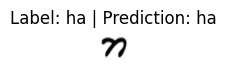

In [ ]:
image_paths = ['/content/ha_2.png']  # Ganti dengan path ke gambar yang ingin diklasifikasikan
labels = [os.path.basename(image_path).split('_')[0] for image_path in image_paths]
images_data = [load_image(image_path) for image_path in image_paths]
predictions = classify_new_data(images_data, svm_models)
# Menampilkan gambar beserta label dan prediksi
display_images_with_predictions(image_paths, labels, predictions, width=0.8, height=0.8)

#Klasifikasi Data Uji

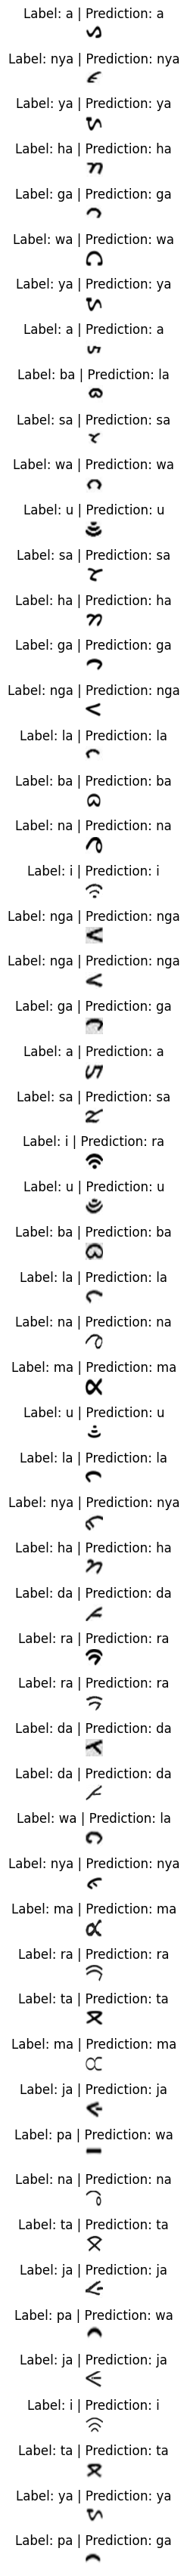

In [ ]:
# Folder path dimana gambar uji disimpan
image_folder_path = '/content/drive/MyDrive/DATASET/DATA UJI'
# Mendapatkan daftar file gambar dan label yang sesuai
image_paths = [os.path.join(image_folder_path, fname) for fname in os.listdir(image_folder_path)]
labels = [fname.split('_')[0] for fname in os.listdir(image_folder_path)]  # Pastikan nama file mengandung label sebagai prefix
# Mengekstrak fitur HOG dari setiap gambar
features = [load_image(image_path) for image_path in image_paths]
# Mengklasifikasikan data uji
predictions = classify_new_data(features, svm_models)
# Menampilkan gambar beserta label dan prediksi
display_images_with_predictions(image_paths, labels, predictions)

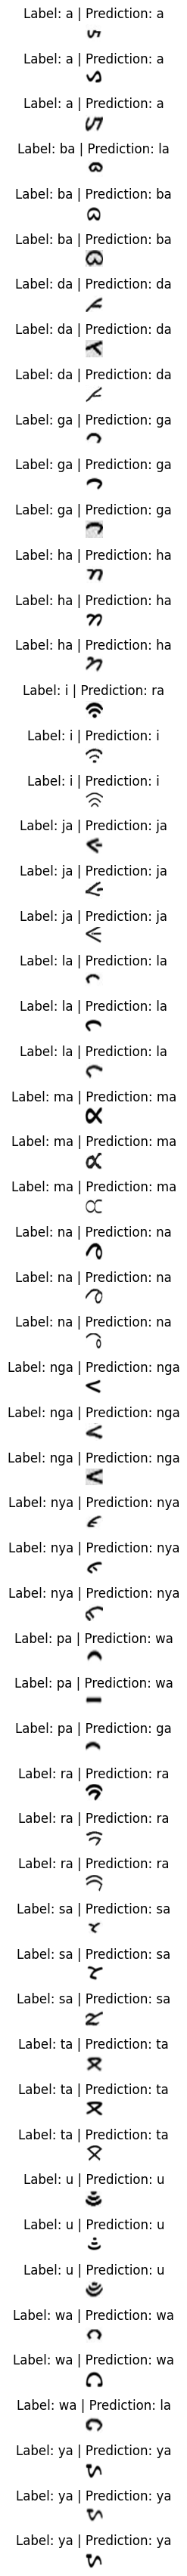

In [ ]:
import os
# Folder path dimana gambar uji disimpan
image_folder_path = '/content/drive/MyDrive/DATASET/DATA UJI'
# Mendapatkan daftar file gambar dan label yang sesuai
image_files = sorted(os.listdir(image_folder_path))  # Mengurutkan file berdasarkan nama
# Mendapatkan path dan label sesuai dengan urutan
image_paths = [os.path.join(image_folder_path, fname) for fname in image_files]
labels = [fname.split('_')[0] for fname in image_files]  # Pastikan nama file mengandung label sebagai prefix
# Mengekstrak fitur HOG dari setiap gambar
features = [load_image(image_path) for image_path in image_paths]
# Mengklasifikasikan data uji
predictions = classify_new_data(features, svm_models)
# Menampilkan gambar beserta label dan prediksi
display_images_with_predictions(image_paths, labels, predictions)

#Confusion Matriks dan Akurasi




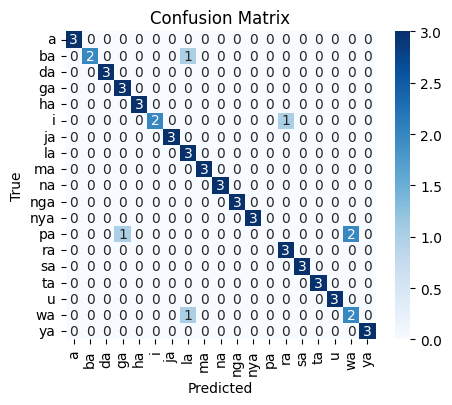

Accuracy: 89.47%
Classification Report:
              precision    recall  f1-score   support

           a       1.00      1.00      1.00         3
          ba       1.00      0.67      0.80         3
          da       1.00      1.00      1.00         3
          ga       0.75      1.00      0.86         3
          ha       1.00      1.00      1.00         3
           i       1.00      0.67      0.80         3
          ja       1.00      1.00      1.00         3
          la       0.60      1.00      0.75         3
          ma       1.00      1.00      1.00         3
          na       1.00      1.00      1.00         3
         nga       1.00      1.00      1.00         3
         nya       1.00      1.00      1.00         3
          pa       0.00      0.00      0.00         3
          ra       0.75      1.00      0.86         3
          sa       1.00      1.00      1.00         3
          ta       1.00      1.00      1.00         3
           u       1.00      1.00      1.

In [ ]:
evaluate_model(labels, predictions)